# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Teguh Alfian]
- **Email:** [teguhalfian01.mta@gmail.com]
- **ID Dicoding:** [Muhammad Teguh Alfian]

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbedaan **rata-rata** jumlah penyewaan sepeda berdasarkan musim?
2. Bagaimana pengaruh kondisi cuaca terhadap **rata-rata** jumlah penyewaan sepeda?
3. Bagaimana tren bulanan penyewaan sepeda tiap tahunnya berdasarkan **rata-rata** jumlah penyewaan sepeda?
4. Bagaimana perbedaan **jumlah** penyewaan sepeda pada beberapa waktu (pagi, siang, sore, malam)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#MEMASUKKAN DATASET KE DALAM DATAFRAME
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
len(df)

17379

**Insight**:<br>
- Dataset memiliki 17379 baris dan 17 kolom

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight**:<br>
- Tipe data terdiri dari float(4 kolom), int(12 kolom), dan object(1 kolom).

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.duplicated().sum()

0

**Insight**:<br>
- Tidak terdapat data duplikat

In [7]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight**:<br>
- Tidak terdapat data kosong (null)

### Cleaning Data

In [8]:
df = df.rename(columns={'yr':'year',
                        'mnth':'month',
                        'hum':'humidity',
                        'weathersit':'weather',
                        'cnt':'count',
                        'hr':'hour',
                        'dteday':'day date',
                        'temp':'temperature'})
df.columns

Index(['instant', 'day date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Insight:**
- Berikut merupakan penjelasan dari kolom:<br>
  - instant : Index pada record
  - day date : Tanggal
  - season : Musim<br>
  (1: Spring, 2. Summer, 3. Fall, 4. Winter)
  - year : Tahun <br>(0: 2011, 1: 2012)
  - month : Bulan <br>(1 sampai 12)
  - hour : Jam <br>(0 sampai 23)
  - holiday	: Hari Libur <br>(tanggal merah/weekend berdasarkan http://dchr.dc.gov/page/holiday-schedule)
  - weekday	: Weekday
  - workingday : Hari kerja <br>(0 jika Libur/Weekend, 1 jika selain itu)
  - weathersit : Cuaca<br>
  (1. Clear, 2. Mist Cloudy, 3. Light Snow/Rain, 4. Heavy Rain/Snow)
  - temperature	: Suhu
  - atemp	: Suhu yang dirasakan
  - humidity : Kelembapan
  - windspeed	: Kecepatan Angin
  - casual	: Pengguna Non-Registrasi
  - registered : Pengguna Teregistrasi
  - count : Jumlah Total Penyewaan Sepeda

In [9]:
df["day date"] = pd.to_datetime(df["day date"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   day date     17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weather      17379 non-null  int64         
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

**Insight:**
- Tipe data ***day date*** berhasil diubah menjadi ***datetime***
- Sudah tidak ada tipe data ***object***

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
df.groupby(by="season").agg({
    "count": "mean",
    "casual":"mean",
    "registered":"mean"
})

,count,casual,registered
season,,,
1,111.114569,14.290901,96.823668
2,208.344069,46.160581,162.183488
3,236.016237,50.287144,185.729093
4,198.868856,30.666824,168.202032


**Insight**:<br>
- Perbedaan musim berpengaruh pada penyewaan sepeda.
- Rata-rata penyewaan dari tertinggi ke terendah yaitu pada musim:
  - gugur/fall (3) dengan nilai 236.
  - panas/summer (2) dengan nilai 208.
  - dingin/winter (4) dengan nilai 198.
  - semi/spring (1) dengan nilai 111.

In [12]:
df.groupby(by="weather").agg({
    "count": "mean",
    "casual":"mean",
    "registered":"mean"
})

,count,casual,registered
weather,,,
1,204.869272,40.545431,164.323841
2,175.165493,29.595290,145.570202
3,111.579281,16.055673,95.523608
4,74.333333,2.666667,71.666667


**Insight**:<br>
- Cuaca mempengaruhi angka penyewaan sepeda.
- Rata-rata penyewaan dari tertinggi ke terendah yaitu pada cuaca:
  - Cerah dengan nilai rata-rata 204
  - Berkabut dengan nilai rata-rata 175
  - Hujan/salju ringan nilai rata-rata 111
  - Hujan/salju lebat nilai rata-rata 74

In [13]:
df.groupby(by="workingday").agg({
    "count": "mean",
    "casual":"mean",
    "registered":"mean"
})

,count,casual,registered
workingday,,,
0,181.405332,57.441422,123.963910
1,193.207754,25.561315,167.646439


**Insight**:<br>
- Hari kerja (1) memiliki rata-rata penyewaan sepeda lebih tinggi daripada hari libur/weekend (0)

**Insight**:<br>
- ***Registered User*** selalu lebih tinggi nilai rata-rata penyewaan sepedanya daripada ***Casual User***

## Visualization & Explanatory Analysis

### Pertanyaan 1:

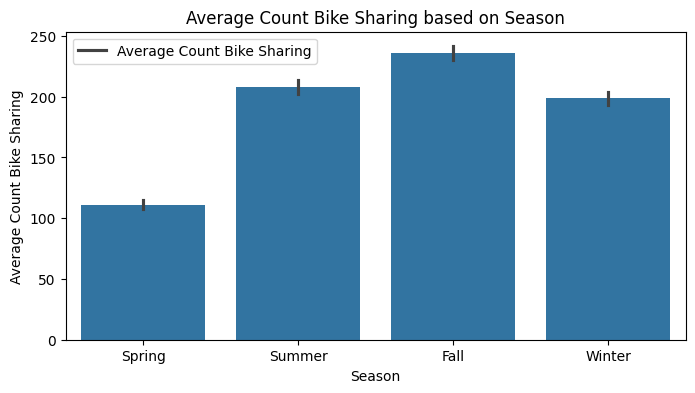

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(x='season', y='count', data=df)
plt.xlabel('Season')
plt.ylabel('Average Count Bike Sharing')
plt.title('Average Count Bike Sharing based on Season')
plt.xticks(ticks=[0,1,2,3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(labels=['Average Count Bike Sharing'])
plt.show()

### Pertanyaan 2:

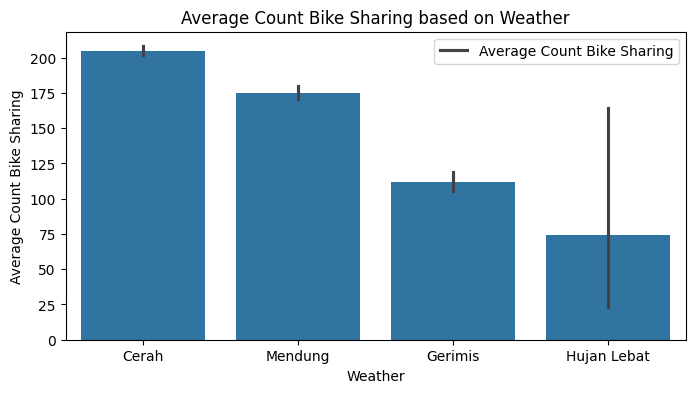

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(x='weather', y='count', data=df)
plt.xlabel('Weather')
plt.ylabel('Average Count Bike Sharing')
plt.title('Average Count Bike Sharing based on Weather')
plt.xticks(ticks=[0,1,2,3], labels=['Cerah', 'Mendung', 'Gerimis', 'Hujan Lebat'])
plt.legend(labels=['Average Count Bike Sharing'])
plt.show()

### Pertanyaan 3:

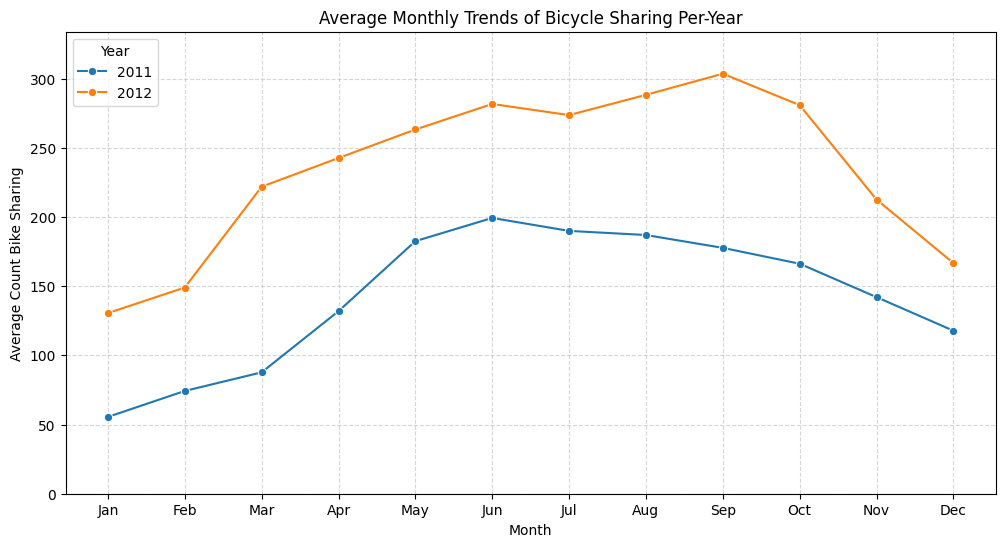

In [21]:
monthly_trend = df.groupby(['year', 'month'])['count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', hue='year', data=monthly_trend, marker='o')

plt.xlabel('Month')
plt.ylabel('Average Count Bike Sharing')
plt.title('Average Monthly Trends of Bicycle Sharing Per-Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylim(0, monthly_trend['count'].max() * 1.1)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['2011' if label == '0' else '2012' for label in labels]
plt.legend(handles, labels, title='Year', loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Insight**:<br>
- Tahun 2011: Januari hingga Juni mengalami peningkatan rata-rata jumlah penyewaan, sedangkan Juli hingga Desember mengalami penurunan secara perlahan. Dengan catatan yaitu:<br>
  - Januari, 2011 merupakan bulan penyewaan sepeda paling sedikit dalam setahun dengan rata-rata penyewaan 50 sepeda lebih sedikit. <br>
  - Juni, 2011 merupakan bulan penyewaan sepeda paling tinggi dalam setahun dengan rata-rata penyewaan hampir menyentuh 200 sepeda.<br>
- Tahun 2012: Januari hingga September mengalami peningkatan rata-rata jumlah penyewaan, dengan lonjakan tajam dari Februari ke Maret. Sementara itu, Oktober hingga Desember mengalami penurunan bertahap. Dengan catatan yaitu:<br>
  - Januari, 2012 merupakan bulan penyewaan sepeda paling sedikit dalam setahun dengan rata-rata penyewaan kurang dari 150 sepeda. Namun, angka ini masih lebih baik daripada tahun sebelumnya.<br>
  - September, 2012 merupakan bulan penyewaan sepeda paling tinggi dalam setahun dengan rata-rata penyewaan melebihi 300 sepeda.

### Pertanyaan 4:

In [17]:
def assign_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df['Time'] = df['hour'].apply(assign_time_of_day)

**Insight**:<br>
- Terdapat empat bagian waktu yaitu pagi, siang, sore, dan malam

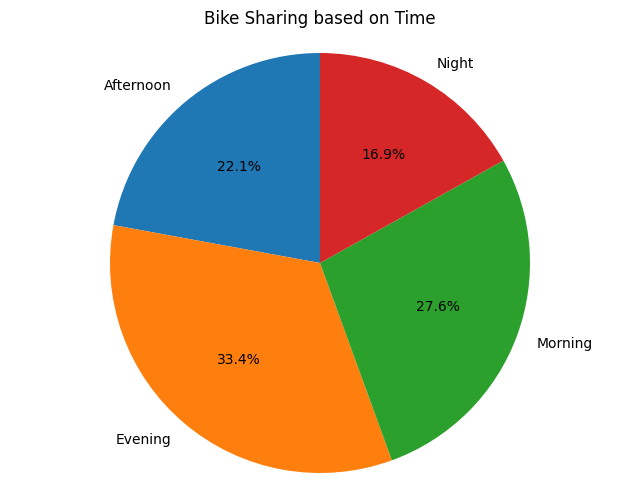

In [18]:
time_of_day_counts = df.groupby('Time')['count'].sum()

plt.figure(figsize=(8, 6))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Bike Sharing based on Time')
plt.axis('equal')

plt.show()


**Insight:**
- **Jumlah** penyewaan tertinggi yaitu pada sore hari dengan persentase 33.4%
- Kemudian disusul pagi hari dengan persentase 27.6%
- Peringkat ketiga yaitu pada siang hari dengan persentase 22.1%
- Lalu, **jumlah** penyewaan terendah yaitu pada malam hari dengan persentase 16.9%

## Analisis Lanjutan (Opsional)

## Conclusion

**Pertanyaan 1**:<br>
1. Perbedaan musim berpengaruh pada penyewaan sepeda. Rata-rata penyewaan dari tertinggi ke terendah yaitu pada musim:
  - gugur/fall (3) dengan nilai 236.
  - panas/summer (2) dengan nilai 208.
  - dingin/winter (4) dengan nilai 198.
  - semi/spring (1) dengan nilai 111.<br>
- Dapat disimpulkan bahwa musim gugur merupakan sepeda paling sering disewa. Lalu, musim semi menjadi musimm yang paling sedikit orang menyewa sepeda.<br>

**Pertanyaan 2**:<br>
2. Cuaca memengaruhi rata-rata jumlah penyewaan sepeda.
- Rata-rata penyewaan dari tertinggi ke terendah yaitu pada cuaca:
  - Cerah dengan nilai rata-rata 204
  - Berkabut dengan nilai rata-rata 175
  - Hujan/salju ringan nilai rata-rata 111
  - Hujan/salju lebat nilai rata-rata 74<br>
- Dapat disimpulkan bahwa penyewaan sepeda paling sering pada saat cuaca sedang cerah dan yang paling jarang adalah saat hujan lebat<br>

**Pertanyaan 3:**<br>
3. Tren bulanan total penyewaan sepeda di tahun 2011 dan 2012:<br>
- Tahun 2011: Januari hingga Juni mengalami peningkatan rata-rata jumlah penyewaan, sedangkan Juli hingga Desember mengalami penurunan secara perlahan. Dengan catatan yaitu:<br>
  - Januari, 2011 merupakan bulan penyewaan sepeda paling sedikit dalam setahun dengan rata-rata penyewaan 50 sepeda lebih sedikit. <br>
  - Juni, 2011 merupakan bulan penyewaan sepeda paling tinggi dalam setahun dengan rata-rata penyewaan hampir menyentuh 200 sepeda.<br>
- Tahun 2012: Januari hingga September mengalami peningkatan rata-rata jumlah penyewaan, dengan lonjakan tajam dari Februari ke Maret. Sementara itu, Oktober hingga Desember mengalami penurunan bertahap. Dengan catatan yaitu:<br>
  - Januari, 2012 merupakan bulan penyewaan sepeda paling sedikit dalam setahun dengan rata-rata penyewaan kurang dari 150 sepeda. Namun, angka ini masih lebih baik daripada tahun sebelumnya.<br>
  - September, 2012 merupakan bulan penyewaan sepeda paling tinggi dalam setahun dengan rata-rata penyewaan melebihi 300 sepeda.<br>
- Dapat disimpulkan bahwa penyewaan sepeda memiliki pola yang cukup mirip, yaitu pada awal tahun penyewaan sepeda berada pada rata-rata paling rendah, lalu kemudian akan naik perlahan tiap bulannya. Kemudian, pertengahan tahun akan menjadi rata-rata penyewaan sepeda paling tinggi. Setelah itu, rata-rata penyewaan sepeda akan turun sampai akhir tahun (Desember)<br>

**Pertanyaan 4**:
4. Waktu cukup berpengaruh terhadap penyewaan sepeda. <br>
- **Jumlah** penyewaan tertinggi yaitu pada sore hari dengan persentase 33.4%
- Kemudian disusul pagi hari dengan persentase 27.6%
- Peringkat ketiga yaitu pada siang hari dengan persentase 22.1%
- Lalu, **jumlah** penyewaan terendah yaitu pada malam hari dengan persentase 16.9% <br><br>
- Dapat disimpulkan bahwa terdapat perbedaan jumlah penyewaan sepeda berdasarkan waktu, yaitu sepeda paling sering disewa adalah pada sore hari dan paling sedikit disewa pada malam hari.


**Saran Bisnis**:
1. Memberikan diskon khusus pada musim semi dan musim dingin, sehingga orang-orang akan tertarik untuk menyewa sepeda.
2. Menyediakan jas hujan untuk orang yang menyewa sepeda.
3. Memberikan layanan minuman hangat gratis kepada penyewa saat musim dingin/hujan lebat.
4. Menawarkan event khusus yang diadakan pada awal/akhir tahun untuk meningkatkan rata-rata penyewaan sepeda.
5. Menambahkan lampu pada sepeda, sehingga pada saat malam hari bisa melihat jalan dengan jelas.